# BUYER LOCATION

In [304]:
#buyer location
df = pd.read_csv('buyer_city.csv')
df = df.groupby('from_city').sum().reset_index().rename(columns={0:'count'})
df = df.replace({'DI YOGYAKARTA':'YOGYAKARTA','DKI JAKARTA':'JAKARTA RAYA','KEPULAUAN BANGKA BELITUNG':'BANGKA BELITUNG'})

#geometry
path = 'gadm36_IDN_1.json'
df_geo = gpd.read_file(path)
df_geo['NAME_1'] = df_geo['NAME_1'].str.upper()

In [306]:
df_join = df_geo.merge(df, how='outer', left_on="NAME_1", right_on="from_city")
df_join = df_join.dropna(subset = ['geometry']).fillna({'count':0})
df_join.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,from_city,count
0,IDN,Indonesia,IDN.1_1,ACEH,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",ACEH,70148.0
1,IDN,Indonesia,IDN.2_1,BALI,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",BALI,118.0
2,IDN,Indonesia,IDN.3_1,BANGKA BELITUNG,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",BANGKA BELITUNG,37927.0
3,IDN,Indonesia,IDN.4_1,BANTEN,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",BANTEN,1110.0
4,IDN,Indonesia,IDN.5_1,BENGKULU,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...",BENGKULU,2662.0


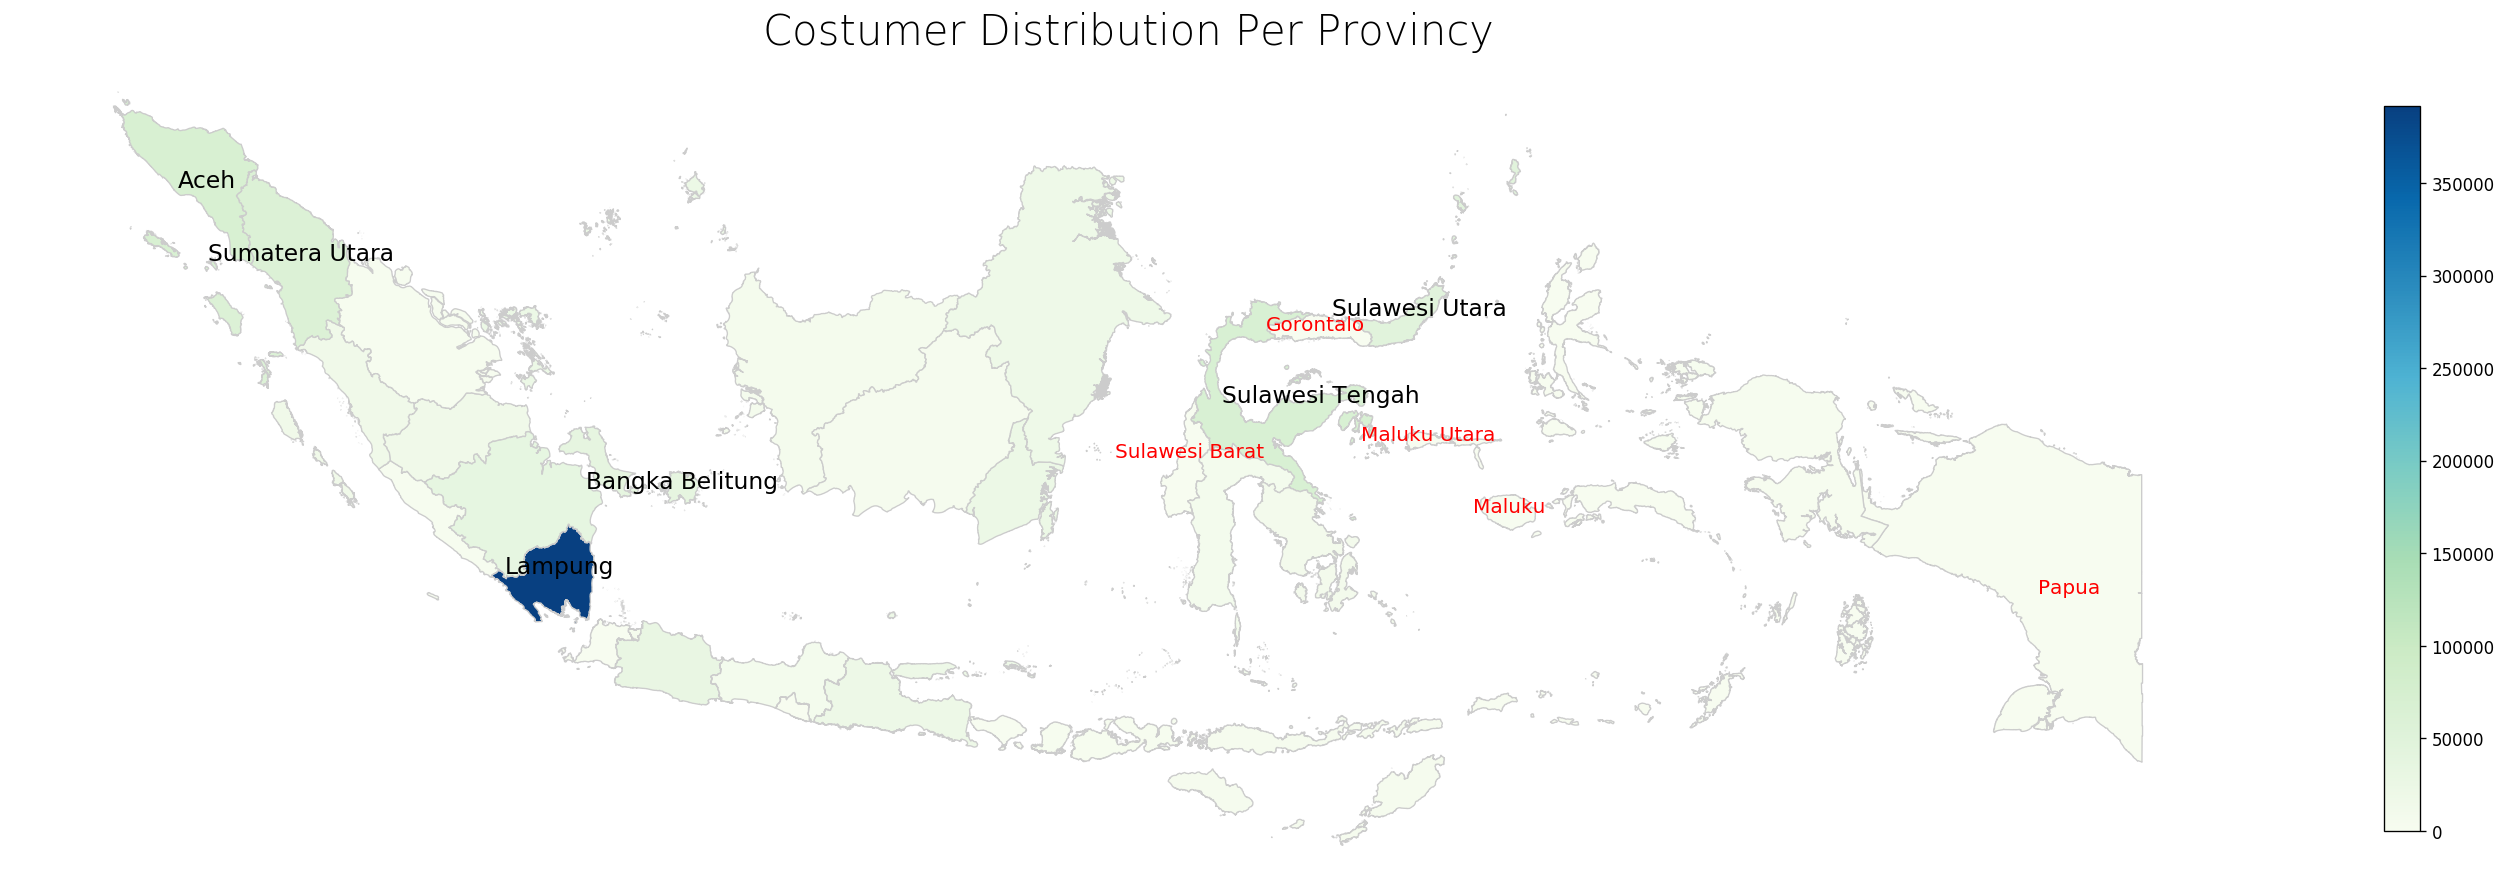

In [309]:
# set a variable that will call whatever column we want to visualise on the map
cmap = 'GnBu'
values = 'count'
# set the value range for the choropleth
vmin, vmax = 0,df_join['count'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 20),dpi=120)
# remove the axis
ax.axis('off')
# add a title
title = 'costumer distribution per provincy'.title()
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink=0.4)
# Add Labels Province Name

df_join['coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['coords'] = [coords[0] for coords in df_join['coords']]
top5 = df_join.sort_values('count', ascending=False)['NAME_1'].values[:6]
bottom5 = df_join.sort_values('count', ascending=True)['NAME_1'].values[:5]
for idx, row in df_join.iterrows():
    if row['NAME_1'] in top5:
        plt.annotate(s=row['NAME_1'].title(), xy=row['coords'],horizontalalignment='center',size=14, color='k')
    if row['NAME_1'] in bottom5:
        plt.annotate(s=row['NAME_1'].title(), xy=row['coords'],horizontalalignment='center',size=12, color='r')

# create map
df_join.plot(column=values, cmap=cmap,linewidth=0.8, ax=ax, edgecolor='0.8');


# BUYER per COURIER

In [324]:
#buyer location
df = pd.read_csv('city_buyer_per_courier.csv')
df = df.groupby('provinsi').sum().reset_index().rename(columns={'buyer_per_courier':'count'})
df = df.replace({'DI YOGYAKARTA':'YOGYAKARTA','DKI JAKARTA':'JAKARTA RAYA','KEPULAUAN BANGKA BELITUNG':'BANGKA BELITUNG'})

#geometry
path = 'gadm36_IDN_1.json'
df_geo = gpd.read_file(path)
df_geo['NAME_1'] = df_geo['NAME_1'].str.upper()

In [326]:
df_join = df_geo.merge(df, how='outer', left_on="NAME_1", right_on="provinsi")
df_join = df_join.dropna(subset = ['geometry']).fillna({'count':0})
df_join.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,provinsi,from_city,count_buyer,count_courier,count
0,IDN,Indonesia,IDN.1_1,ACEH,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",ACEH,253.0,213233.0,131.0,12997.153175
1,IDN,Indonesia,IDN.2_1,BALI,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",BALI,2493.0,279.0,31.0,62.392857
2,IDN,Indonesia,IDN.3_1,BANGKA BELITUNG,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ...",BANGKA BELITUNG,1001.0,110548.0,66.0,8569.291667
3,IDN,Indonesia,IDN.4_1,BANTEN,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",BANTEN,2148.0,3421.0,33.0,435.095238
4,IDN,Indonesia,IDN.5_1,BENGKULU,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...",BENGKULU,1195.0,7363.0,50.0,683.335043


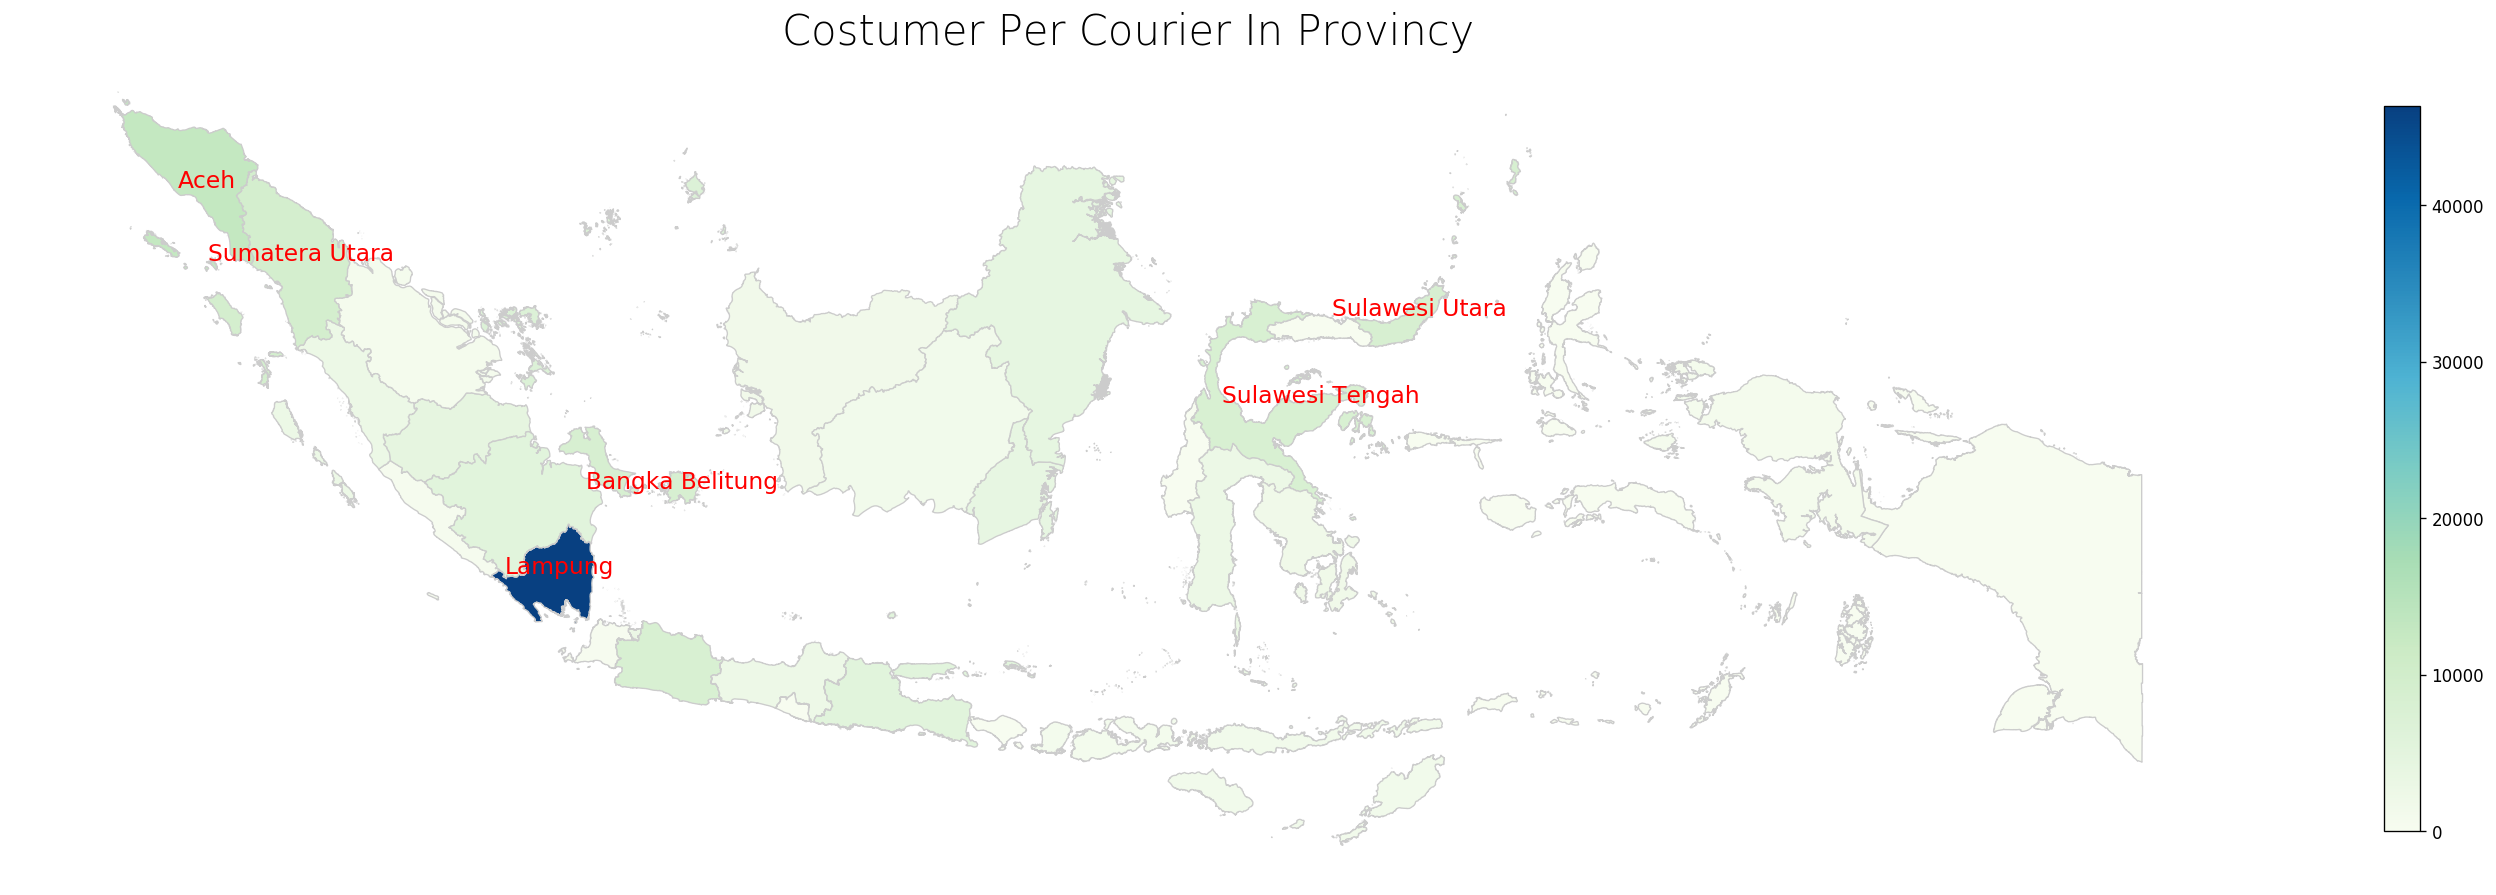

In [328]:
# set a variable that will call whatever column we want to visualise on the map
cmap = 'GnBu'
values = 'count'
# set the value range for the choropleth
vmin, vmax = 0,df_join['count'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 20),dpi=120)
# remove the axis
ax.axis('off')
# add a title
title = 'costumer per courier in provincy'.title()
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink=0.4)
# Add Labels Province Name

df_join['coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['coords'] = [coords[0] for coords in df_join['coords']]
top5 = df_join.sort_values('count', ascending=False)['NAME_1'].values[:6]
for idx, row in df_join.iterrows():
    if row['NAME_1'] in top5:
        plt.annotate(s=row['NAME_1'].title(), xy=row['coords'],horizontalalignment='center',size=14, color='r')

# create map
df_join.plot(column=values, cmap=cmap,linewidth=0.8, ax=ax, edgecolor='0.8');
